<a href="https://colab.research.google.com/github/ArshockAbedan/scikit-learn/blob/main/SGD_WeightedSamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SGD: Weighted samples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
np.random.seed(20)

In [4]:
np.random.rand(10,2) + [1, 1]

array([[1.85762553, 1.94977903],
       [1.56168686, 1.17878052],
       [1.77025193, 1.49238104],
       [1.63125307, 1.83949792],
       [1.4610394 , 1.49794007],
       [1.67941112, 1.65078591],
       [1.26879524, 1.06732467],
       [1.77144514, 1.48098413],
       [1.32920641, 1.51064106],
       [1.26362883, 1.31051155]])

In [33]:
X = np.r_[np.random.rand(10,2) + [1, 1], np.random.rand(10,2)]

In [34]:
y = [1] * 10 + [-1] * 10 

In [35]:
sample_weight = 100 * np.abs(np.random.rand(20))

In [36]:
sample_weight[:10] *= 10

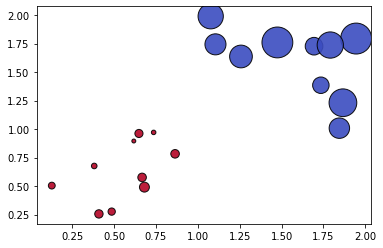

In [38]:
# plot the weighted data points
xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, s=sample_weight,alpha=0.9, cmap=plt.cm.coolwarm_r,edgecolors="black")

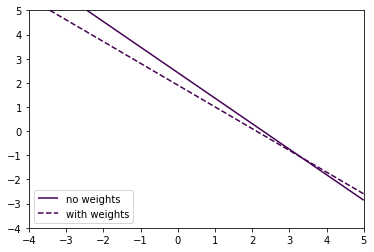

In [41]:
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X,y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = plt.contour(xx, yy, Z, levels=[0], linestyles=["solid"])

# fit the weighted model
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=500)
clf.fit(X, y, sample_weight=sample_weight)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
samples_weights = plt.contour(xx, yy, Z, levels=[0], linestyles=["dashed"])

plt.legend(
    [no_weights.collections[0], samples_weights.collections[0]],
    ["no weights", "with weights"],
    loc="lower left",
)

# plt.xticks(())
# plt.yticks(())
plt.show()